In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
data=pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
data['Purchased'].unique()

array([0, 1])

# Checking Missing value

In [10]:
data.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


# Check for duplicate rows

In [11]:
data.duplicated().sum()

0

# detect outliers based on the IQR

In [12]:
# Identifying numeric columns for outlier detection
numeric_columns = ['EstimatedSalary', 'Age']

In [13]:
# Function to calculate IQR and detect outliers
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [14]:
# Detect outliers in the dataset
outliers = detect_outliers(data, numeric_columns)

In [15]:
# Checking if there are outliers and the number of outliers in each column
outlier_counts = {col: len(outliers[col]) for col in numeric_columns}

In [16]:
# Extract outlier values for each column
outlier_values = {col: outliers[col][col].values for col in numeric_columns}
# Print out the outlier values
for col, values in outlier_values.items():
    print(f"Outliers in {col}: {values}")

Outliers in EstimatedSalary: []
Outliers in Age: []


In [17]:
# Print outlier counts
print(outlier_counts)

{'EstimatedSalary': 0, 'Age': 0}


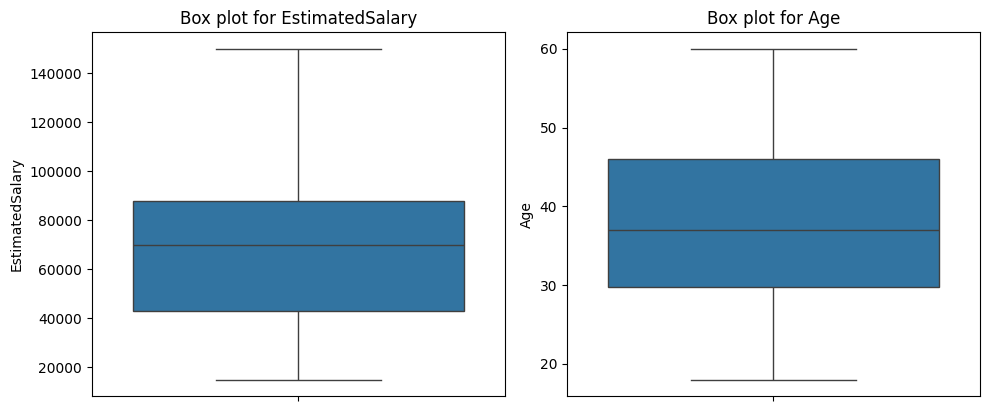

In [18]:
plt.figure(figsize=(10,8))
for i in range(2):
    plt.subplot(2,2,i+1)
    g=sns.boxplot(y=numeric_columns[i],data=data)
    g.set_title(f"Box plot for {numeric_columns[i]}")
plt.tight_layout()
plt.show()

In [19]:
# Convert 'gender' column to numerical values
data['gender_numeric'] = data['Gender'].map({'Male': 0, 'Female': 1})

print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased  gender_numeric
0    15624510    Male   19            19000          0               0
1    15810944    Male   35            20000          0               0
2    15668575  Female   26            43000          0               1
3    15603246  Female   27            57000          0               1
4    15804002    Male   19            76000          0               0
..        ...     ...  ...              ...        ...             ...
395  15691863  Female   46            41000          1               1
396  15706071    Male   51            23000          1               0
397  15654296  Female   50            20000          1               1
398  15755018    Male   36            33000          0               0
399  15594041  Female   49            36000          1               1

[400 rows x 6 columns]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns  # For alternative heatmap plotting

In [21]:
X = data.drop(["User ID","Gender","Purchased"], axis=1)
y=data["Purchased"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (320, 3)
X_test shape is  (80, 3)
y_train shape is  (320,)
y_test shape is  (80,)


In [23]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Viewing
scaler

StandardScaler()

In [24]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

In [25]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.85      0.74      0.79        39

    accuracy                           0.81        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80



In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data["Purchased"])

In [29]:
# Check the unique values of y_test and y_pred
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))

Unique values in y_test: {0, 1}
Unique values in y_pred: {0, 1}


Confusion Matrix:
 [[36  5]
 [10 29]]


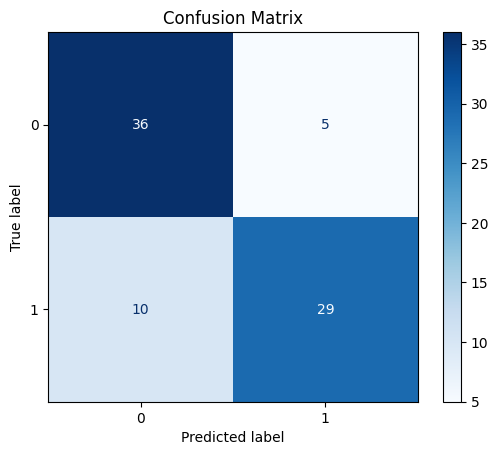

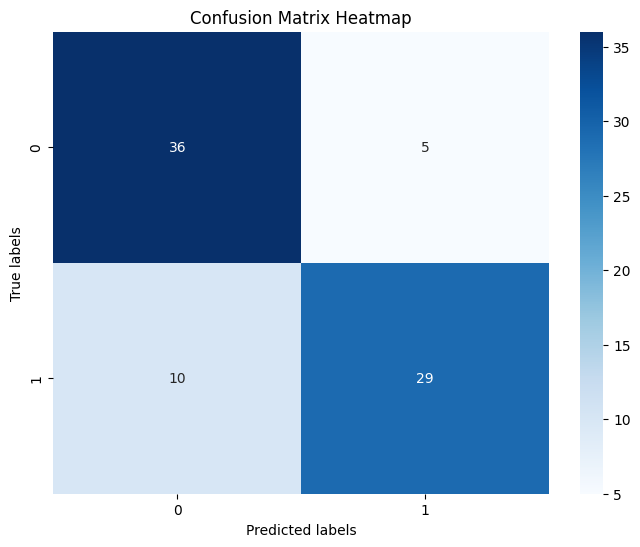

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)  # Print the confusion matrix

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Alternative heatmap plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [36]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.88      0.92      0.90        39

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



In [37]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[36  5]
 [ 3 36]]


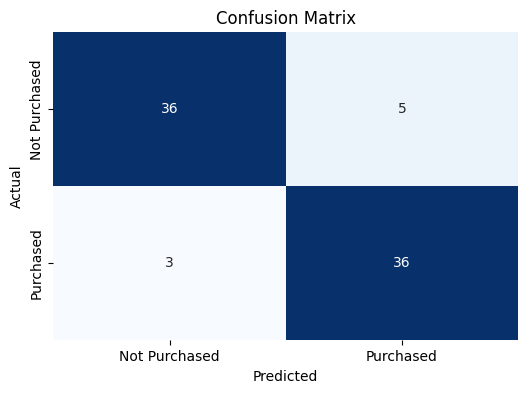

In [38]:
# 1. Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-39-975d947250ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=feature_importances, palette='viridis')


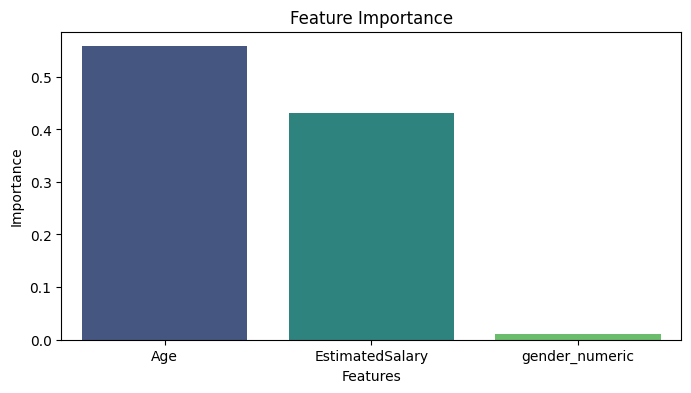

In [39]:
# 2. Feature Importance Plot
feature_importances = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=features, y=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()